# Logistic Regression

Notebook orignially contributed by: [Avinash Kumar](https://github.com/Avinashshah099)




<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github.com/Rishit-dagli/Python3-by-practice/blob/master/Machine%20Learning/sklearn%20examples/Logistic%20Regression/Logistic%20Regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/Rishit-dagli/Python3-by-practice/blob/master/Machine%20Learning/sklearn%20examples/Logistic%20Regression/Logistic%20Regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>


The following notebook uses Pima Indians Diabetes Database in order to determine whether to predict the onset of diabetes based on diagnostic measures. It is followed by a series of steps involving data visualisation and applying **Machine Learning Algorithm (Logistic Regression)**.

We are using [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally contributed by [UCI Machine Learning](https://archive.ics.uci.edu/ml/index.php).

#Import Library

Importing required libraries for Machine Learning Alogorithm and visualizing.

In [ ]:
#Import libraries with alias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Getting the Data
The dataset used here is **diabetes.csv**.

The dataset consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Pregnancies : Number of pregnancies the patient
- Glucose : Level of Glucose
- Insulin : Insulin level
- BMI : BMI value



In [ ]:
#load dataset
pima = pd.read_csv("diabetes.csv")

In [ ]:
pima.head()  #list of top five index

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.shape

(768, 9)

There are 768 rows and 9 columns


In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# let's find out how many 0 values are there in all columns

(pima == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
#We will use 'median' to replace 0 for all columns except for 'Insulin' as diff between mean and median was big
pima['Pregnancies'].replace(0,pima['Pregnancies'].median(),inplace=True)
pima['Glucose'].replace(0,pima['Glucose'].median(),inplace=True)
pima['BloodPressure'].replace(0,pima['BloodPressure'].median(),inplace=True)
pima['SkinThickness'].replace(0,pima['SkinThickness'].median(),inplace=True)
pima['BMI'].replace(0,pima['BMI'].median(),inplace=True)

pima['Insulin'].replace(0,pima['Insulin'].mean(),inplace=True)

In [ ]:
# let's check if all 0 values are replaced now

(pima == 0).sum(axis=0)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
#loading columns of given dataset
list(pima.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

#Exploratory Data Analysis(EDA)

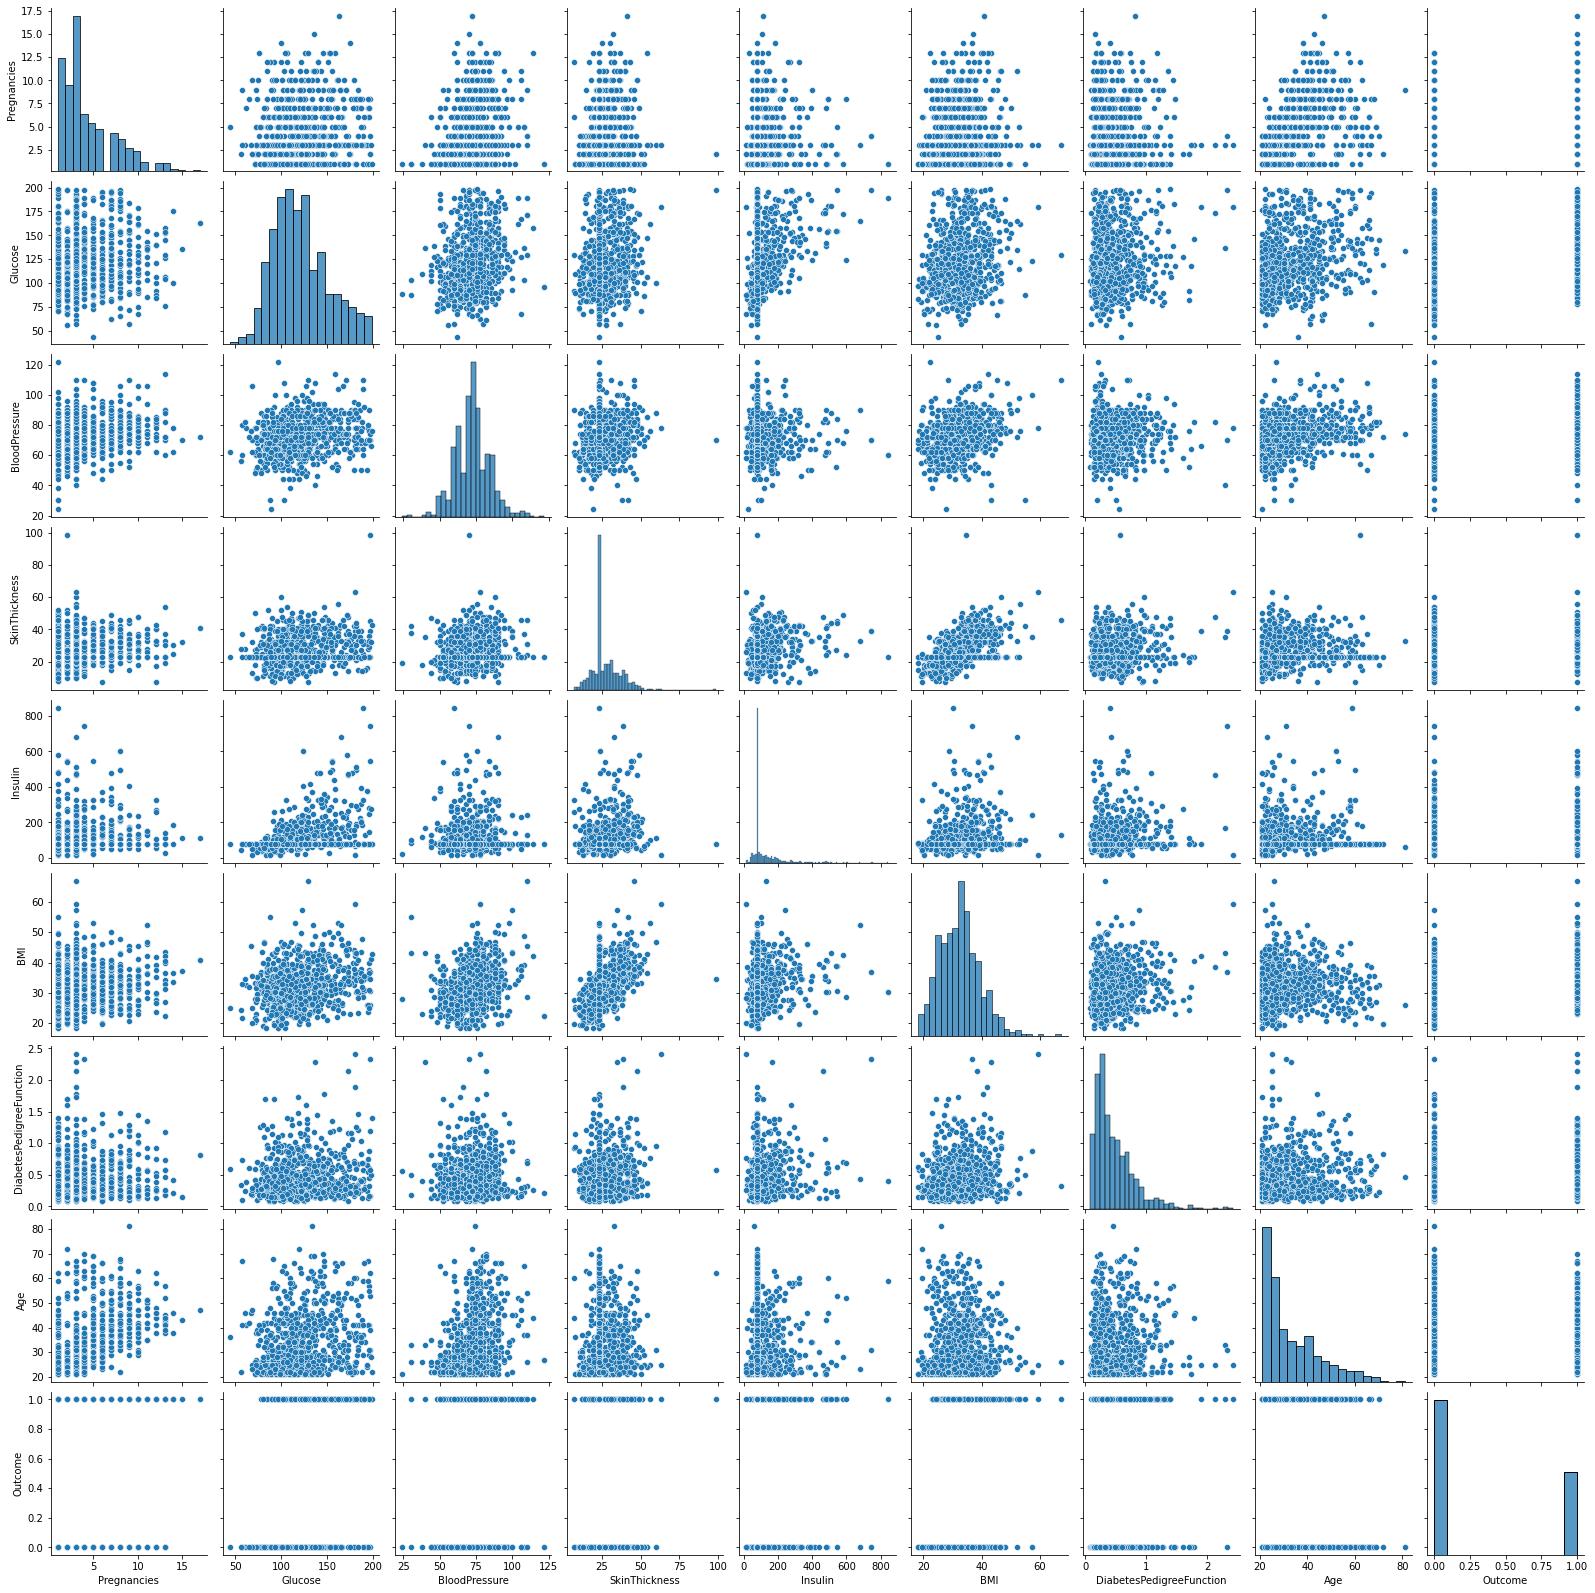

In [ ]:
sns.pairplot(pima)

In [ ]:
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.017330,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.397017,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,0.006385,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.217854,0.546951,0.142977,0.054514,0.189065
Insulin,-0.017330,0.397017,0.006385,0.217854,1.000000,0.189850,0.157806,0.038652,0.179185
BMI,0.080540,0.231400,0.281132,0.546951,0.189850,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.157806,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,0.038652,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.179185,0.312249,0.173844,0.238356,1.000000


There is no strong correlation between any columns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


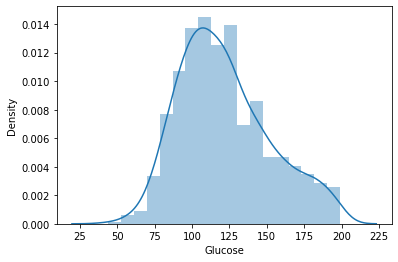

In [ ]:
# Data for BMI, Glucose and BloodPressure has normal distribution
sns.distplot(pima['Glucose'],kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


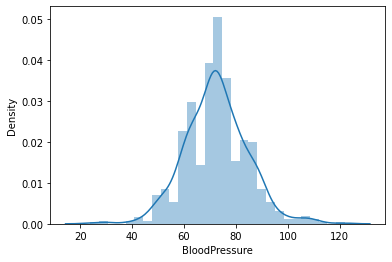

In [ ]:
sns.distplot(pima['BloodPressure'],kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


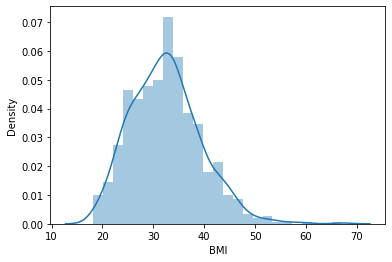

In [ ]:
sns.distplot(pima['BMI'],kde=True)

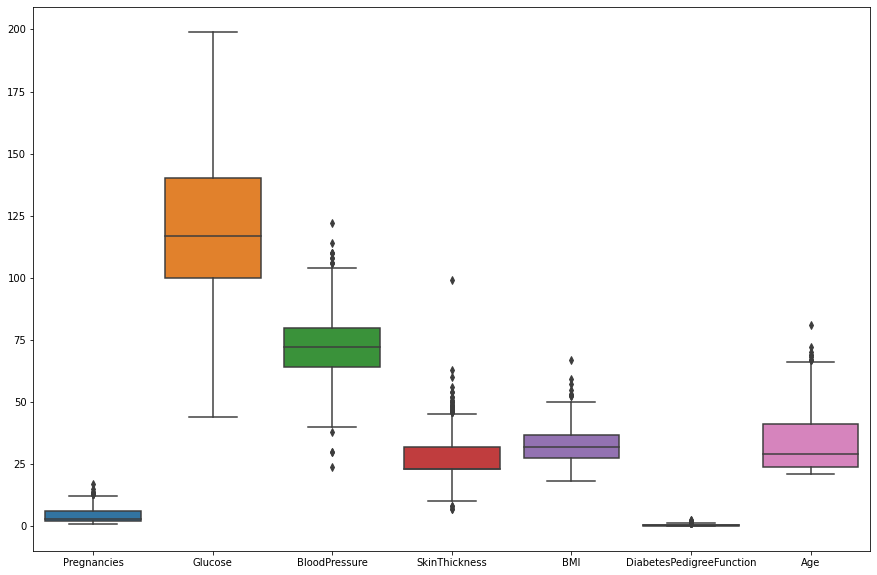

In [ ]:
# Let's check outliers of the dataset columns, we are droping Insuline columns as it have most number of outlires
plt.subplots(figsize=(15,10))
sns.boxplot(data=pima.drop(['Insulin','Outcome'],axis=1))

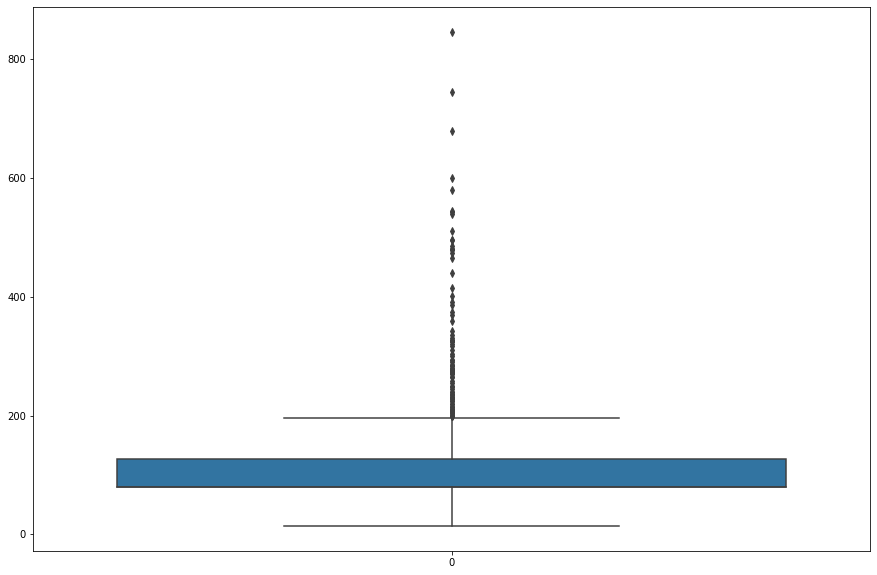

In [ ]:
# Insulin has high number of outliers compared to other columns
plt.subplots(figsize=(15,10))
sns.boxplot(data=pima['Insulin'])

#Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = pima.columns.drop(["Outcome"])
X = pima[feature_cols] # Features
y = pima["Outcome"] # Target variable

# Splitting Data


To understand model performance, dividing the dataset into a training set and a test set is a good strategy.



Let's split dataset by using function **train_test_split()**. You need to pass 3 parameters **features**, **target**, and **test_set size**. Additionally, you can use random_state to select records randomly.

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# training and testing sets are divided in 80:20 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

Here, the Dataset is broken into two parts in a ratio of **70:30**. It means **70%** data will be used for model training and **30%** for model testing.

# Model Development and Prediction


First, import the **Logistic Regression** module and create a Logistic Regression classifier object using **LogisticRegression()** function.



Then, fit your model on the train set using **fit()** and perform prediction on the test set using **predict()**.

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_reg = LogisticRegression()

# fit the model with data
log_reg.fit(X_train,y_train)

# predict the model  
y_pred=log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[141,  16],
       [ 36,  38]])

The dimension of this matrix is 2*2 because this model is binary classification (0 and 1). Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 141 and 38 are actual predictions, and 36 and 16 are incorrect predictions.

#Visualizing Confusion Matrix using Heatmap


Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 257.44, 'Predicted label')

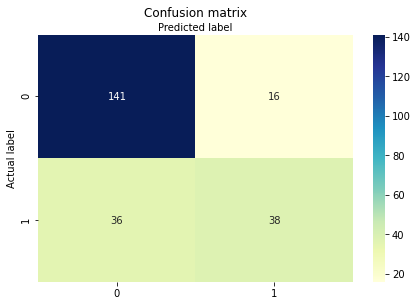

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7748917748917749
Precision: 0.7037037037037037
Recall: 0.5135135135135135


Well, We got a classification rate of 77.5% accuracy.

**Precision**: Precision is about being precise, Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 70.3% of the time.

**Recall**: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 51.3% of the time.

#ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

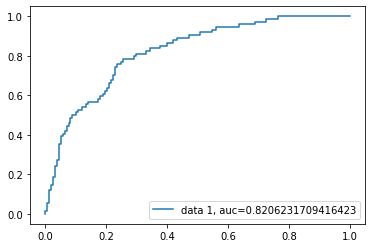

In [ ]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.82. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

#Conclusion
You have learned what the logistic regression is, how to build respective models, how to visualize results and also, you covered some basic concepts such as the sigmoid function, maximum likelihood, confusion matrix, ROC curve.
